In [0]:
import librosa
import librosa.display
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt

In [0]:
def plot_audio(clip, sample_rate, title):
  timesteps = np.arange(len(clip)) / sample_rate  # in seconds

  plt.figure(figsize=(12, 4))
  
  # plot the entire clip 
  plt.plot(timesteps, clip)
  plt.xlabel('Time (s)')
  plt.ylabel('Amplitude')
  plt.title('Raw Audio: {} ({} samples)'.format(title, len(clip)))
  plt.show()

In [0]:
def plot_spectrogram(clip, sample_rate, title):
  n_fft = 1024
  hop_length = 512
  # number of mel frequency bands 
  n_mels = 64

  plt.figure(figsize=(12, 4))
  
  fmin = 20           
  fmax = sample_rate // 2
  mel_spec = librosa.feature.melspectrogram(clip, n_fft=n_fft, hop_length=hop_length,
                                          n_mels=n_mels, sr=sample_rate, power=1.0,
                                          fmin=fmin, fmax=fmax)
  mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
  librosa.display.specshow(mel_spec_db, x_axis='time',  y_axis='mel', 
                         sr=sample_rate, hop_length=hop_length, 
                         fmin=fmin, fmax=fmax)
  plt.title(f'n_mels=64, fmin=20, fmax=8000, {title}, (2D resulting shape : {mel_spec_db.shape})')
  plt.show()

In [0]:
data_path = Path('wave/vowel')

select one wave file from each class

In [8]:
paths = [next((_dir/(str(_dir).split('/')[-1]+'_1')).iterdir()) for _dir in data_path.iterdir()]
paths

[PosixPath('wave/vowel/12/12_1/2018-11-14-00:03:45.16khz.mono.wav'),
 PosixPath('wave/vowel/3/3_1/2018-11-13-23:48:39.16khz.mono.wav'),
 PosixPath('wave/vowel/11/11_1/2018-11-13-20:22:39.16khz.mono.wav'),
 PosixPath('wave/vowel/8/8_1/2018-11-13-23:58:02.16khz.mono.wav'),
 PosixPath('wave/vowel/1/1_1/2018-11-13-20:43:09.16khz.mono.wav'),
 PosixPath('wave/vowel/5/5_1/2018-11-14-00:13:47.16khz.mono.wav'),
 PosixPath('wave/vowel/4/4_1/2018-11-13-23:49:42.16khz.mono.wav'),
 PosixPath('wave/vowel/9/9_1/2018-11-13-20:34:56.16khz.mono.wav'),
 PosixPath('wave/vowel/7/7_1/2018-11-13-20:18:23.16khz.mono.wav'),
 PosixPath('wave/vowel/2/2_1/2018-11-13-23:46:39.16khz.mono.wav'),
 PosixPath('wave/vowel/10/10_1/2018-11-13-20:21:52.16khz.mono.wav'),
 PosixPath('wave/vowel/6/6_1/2018-11-13-20:01:17.16khz.mono.wav')]

sort file paths for easier access

In [11]:
paths = sorted(paths, key=lambda x: int(str(x).split('/')[-3]))
paths

[PosixPath('wave/vowel/1/1_1/2018-11-13-20:43:09.16khz.mono.wav'),
 PosixPath('wave/vowel/2/2_1/2018-11-13-23:46:39.16khz.mono.wav'),
 PosixPath('wave/vowel/3/3_1/2018-11-13-23:48:39.16khz.mono.wav'),
 PosixPath('wave/vowel/4/4_1/2018-11-13-23:49:42.16khz.mono.wav'),
 PosixPath('wave/vowel/5/5_1/2018-11-14-00:13:47.16khz.mono.wav'),
 PosixPath('wave/vowel/6/6_1/2018-11-13-20:01:17.16khz.mono.wav'),
 PosixPath('wave/vowel/7/7_1/2018-11-13-20:18:23.16khz.mono.wav'),
 PosixPath('wave/vowel/8/8_1/2018-11-13-23:58:02.16khz.mono.wav'),
 PosixPath('wave/vowel/9/9_1/2018-11-13-20:34:56.16khz.mono.wav'),
 PosixPath('wave/vowel/10/10_1/2018-11-13-20:21:52.16khz.mono.wav'),
 PosixPath('wave/vowel/11/11_1/2018-11-13-20:22:39.16khz.mono.wav'),
 PosixPath('wave/vowel/12/12_1/2018-11-14-00:03:45.16khz.mono.wav')]

#Index : 0, Class label : 1, Vowel : 'အာ'

Sample Rate   16000 Hz
Clip Length   0.98 seconds
Trimmed clip Length   0.22 seconds


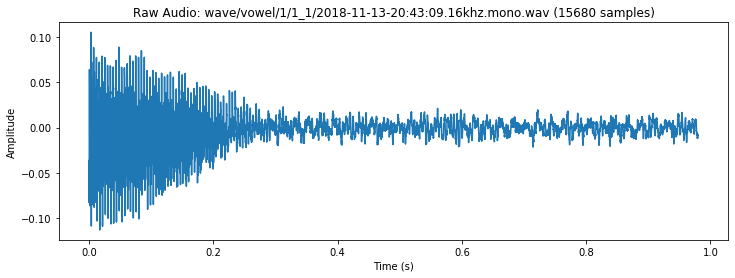

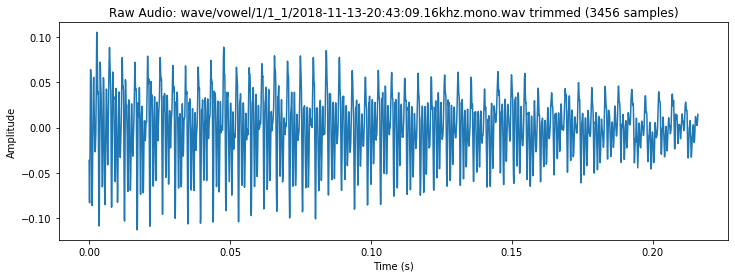

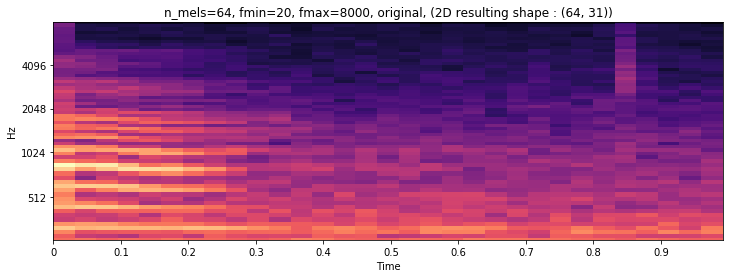

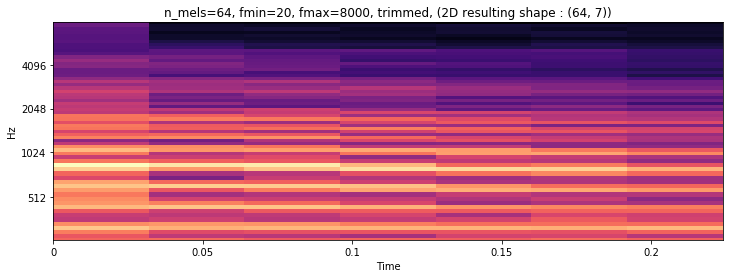

In [12]:
wave_file = paths[0]

clip, sample_rate = librosa.load(wave_file, sr=None)
print('Sample Rate   {} Hz'.format(sample_rate))
print('Clip Length   {:3.2f} seconds'.format(librosa.get_duration(clip, sample_rate)))

trimmed_clip, _ = librosa.effects.trim(clip, top_db=10, frame_length=256, hop_length=128)
print('Trimmed clip Length   {:3.2f} seconds'.format(librosa.get_duration(trimmed_clip, sample_rate)))

plot_audio(clip, sample_rate, wave_file)
plot_audio(trimmed_clip, sample_rate, str(wave_file) + ' trimmed')

plot_spectrogram(clip, sample_rate, 'original')
plot_spectrogram(trimmed_clip, sample_rate, 'trimmed')

#Index : 1, Class label : 2, Vowel : 'အိ'

Sample Rate   16000 Hz
Clip Length   1.58 seconds
Trimmed clip Length   0.11 seconds


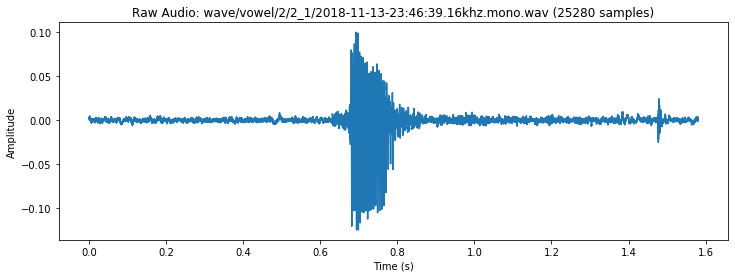

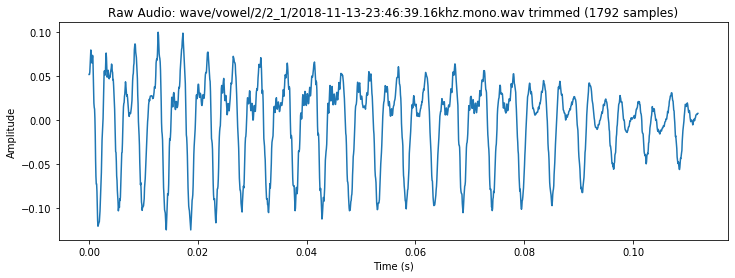

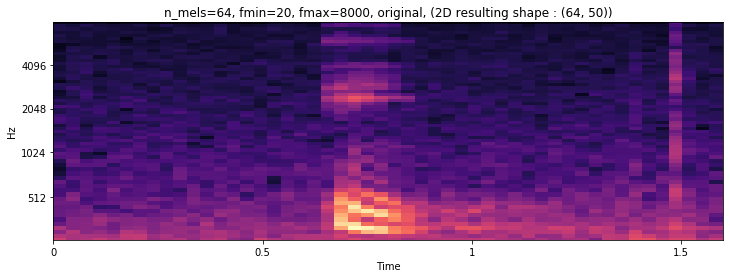

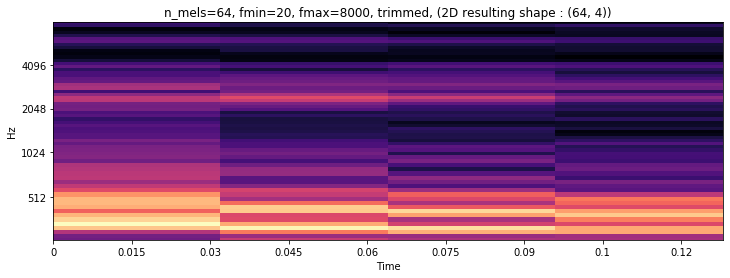

In [13]:
wave_file = paths[1]

clip, sample_rate = librosa.load(wave_file, sr=None)
print('Sample Rate   {} Hz'.format(sample_rate))
print('Clip Length   {:3.2f} seconds'.format(librosa.get_duration(clip, sample_rate)))

trimmed_clip, _ = librosa.effects.trim(clip, top_db=10, frame_length=256, hop_length=128)
print('Trimmed clip Length   {:3.2f} seconds'.format(librosa.get_duration(trimmed_clip, sample_rate)))

plot_audio(clip, sample_rate, wave_file)
plot_audio(trimmed_clip, sample_rate, str(wave_file) + ' trimmed')

plot_spectrogram(clip, sample_rate, 'original')
plot_spectrogram(trimmed_clip, sample_rate, 'trimmed')

#Index : 2, Class label : 3, Vowel : 'အီ'

Sample Rate   16000 Hz
Clip Length   1.37 seconds
Trimmed clip Length   0.23 seconds


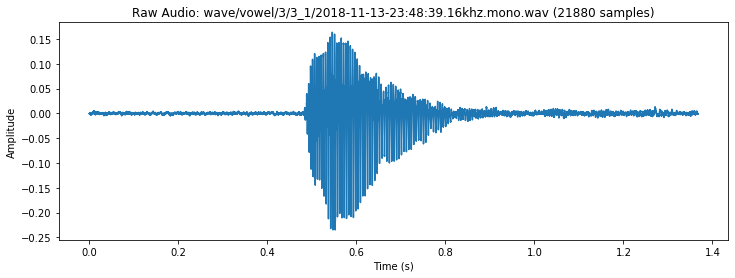

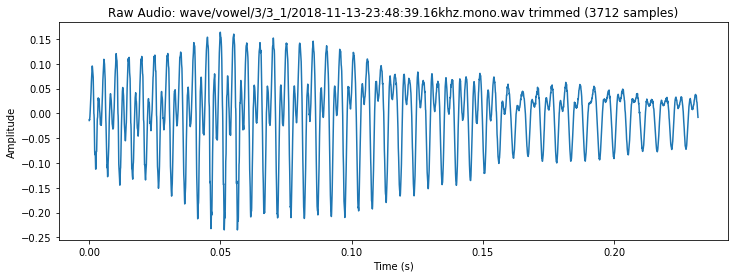

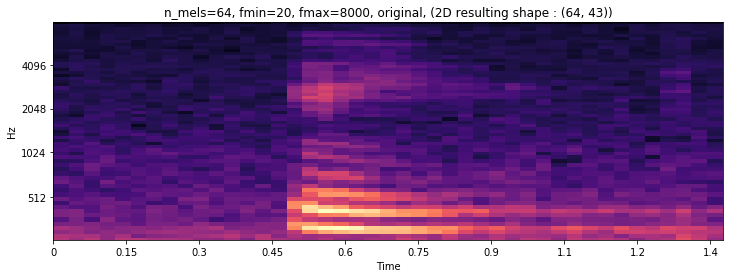

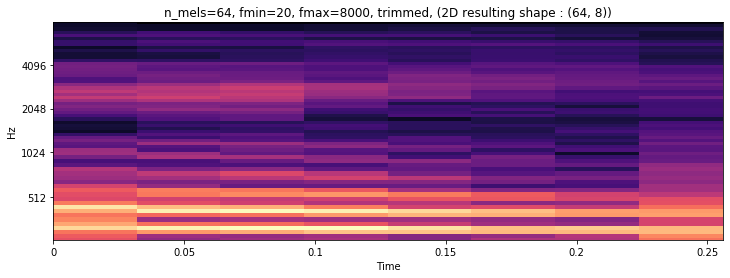

In [14]:
wave_file = paths[2]

clip, sample_rate = librosa.load(wave_file, sr=None)
print('Sample Rate   {} Hz'.format(sample_rate))
print('Clip Length   {:3.2f} seconds'.format(librosa.get_duration(clip, sample_rate)))

trimmed_clip, _ = librosa.effects.trim(clip, top_db=10, frame_length=256, hop_length=128)
print('Trimmed clip Length   {:3.2f} seconds'.format(librosa.get_duration(trimmed_clip, sample_rate)))

plot_audio(clip, sample_rate, wave_file)
plot_audio(trimmed_clip, sample_rate, str(wave_file) + ' trimmed')

plot_spectrogram(clip, sample_rate, 'original')
plot_spectrogram(trimmed_clip, sample_rate, 'trimmed')

#Index : 3, Class label : 4, Vowel : 'အု'

Sample Rate   16000 Hz
Clip Length   1.38 seconds
Trimmed clip Length   0.13 seconds


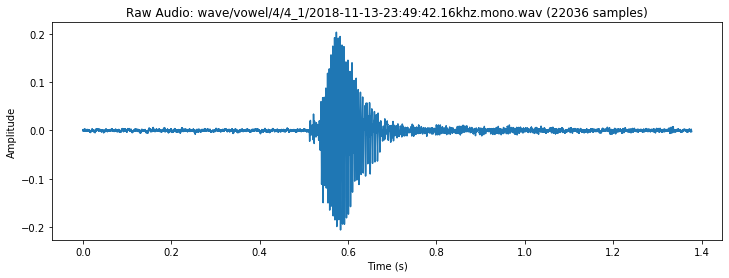

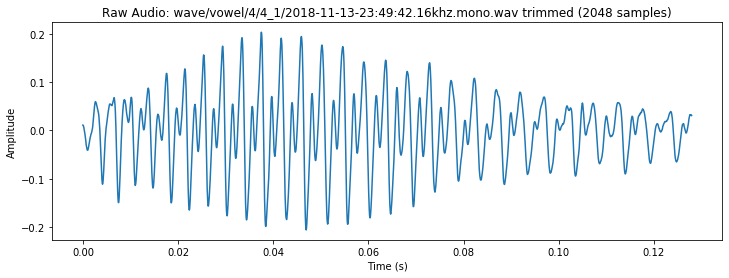

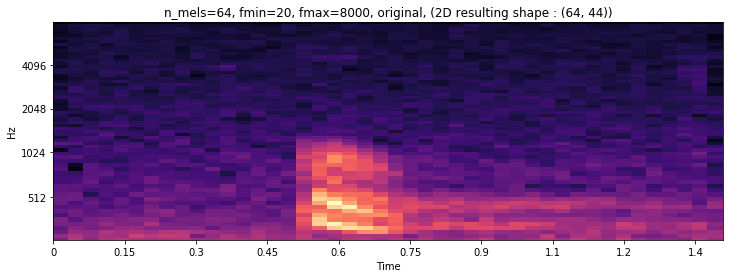

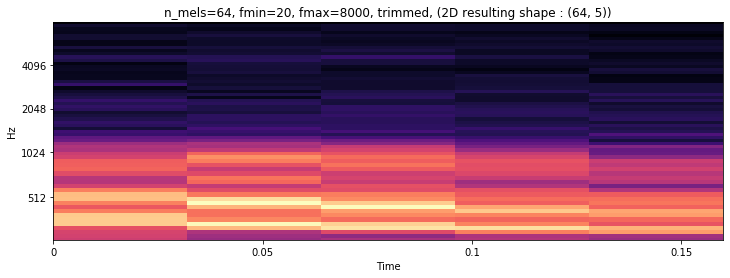

In [15]:
wave_file = paths[3]

clip, sample_rate = librosa.load(wave_file, sr=None)
print('Sample Rate   {} Hz'.format(sample_rate))
print('Clip Length   {:3.2f} seconds'.format(librosa.get_duration(clip, sample_rate)))

trimmed_clip, _ = librosa.effects.trim(clip, top_db=10, frame_length=256, hop_length=128)
print('Trimmed clip Length   {:3.2f} seconds'.format(librosa.get_duration(trimmed_clip, sample_rate)))

plot_audio(clip, sample_rate, wave_file)
plot_audio(trimmed_clip, sample_rate, str(wave_file) + ' trimmed')

plot_spectrogram(clip, sample_rate, 'original')
plot_spectrogram(trimmed_clip, sample_rate, 'trimmed')

#Index : 4, Class label : 5, Vowel : 'အူ'

Sample Rate   16000 Hz
Clip Length   1.37 seconds
Trimmed clip Length   0.26 seconds


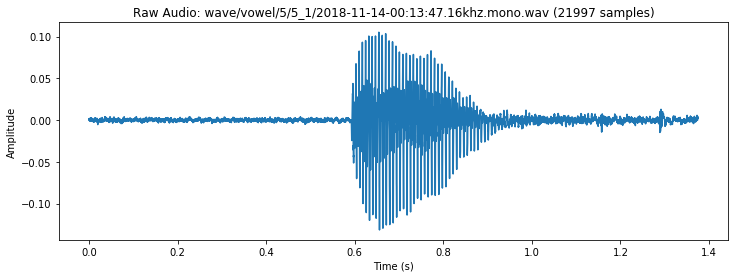

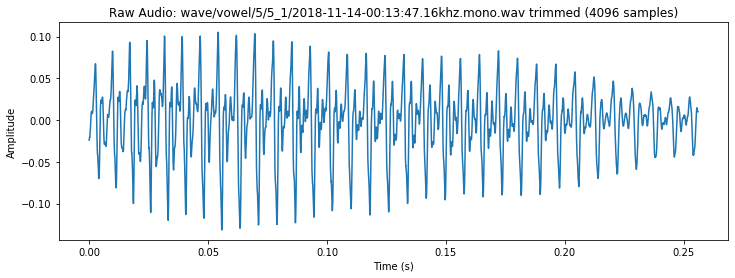

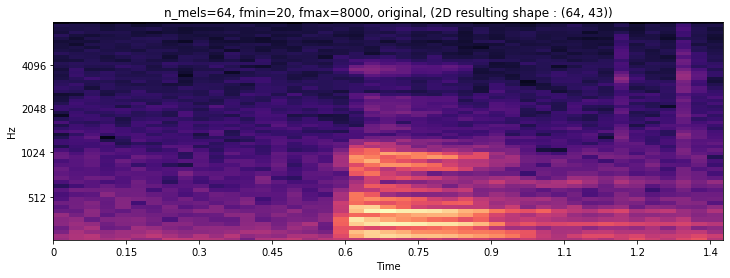

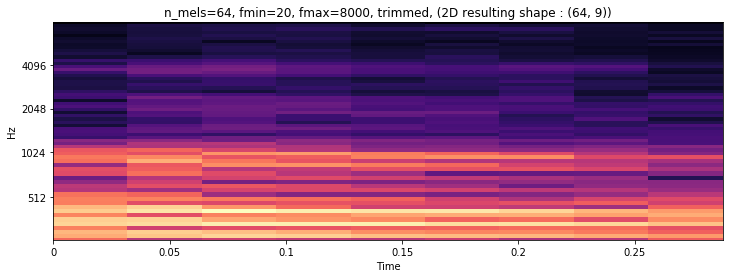

In [16]:
wave_file = paths[4]

clip, sample_rate = librosa.load(wave_file, sr=None)
print('Sample Rate   {} Hz'.format(sample_rate))
print('Clip Length   {:3.2f} seconds'.format(librosa.get_duration(clip, sample_rate)))

trimmed_clip, _ = librosa.effects.trim(clip, top_db=10, frame_length=256, hop_length=128)
print('Trimmed clip Length   {:3.2f} seconds'.format(librosa.get_duration(trimmed_clip, sample_rate)))

plot_audio(clip, sample_rate, wave_file)
plot_audio(trimmed_clip, sample_rate, str(wave_file) + ' trimmed')

plot_spectrogram(clip, sample_rate, 'original')
plot_spectrogram(trimmed_clip, sample_rate, 'trimmed')

#Index : 5, Class label : 6, Vowel : 'အေ'

Sample Rate   16000 Hz
Clip Length   1.19 seconds
Trimmed clip Length   0.26 seconds


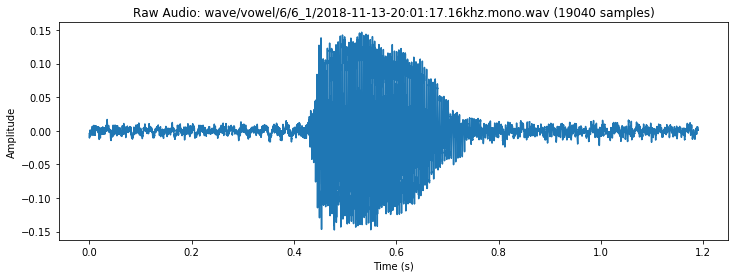

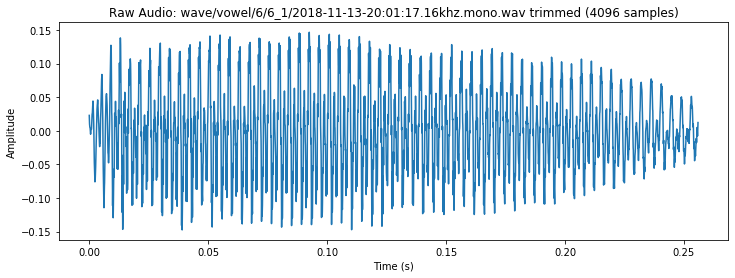

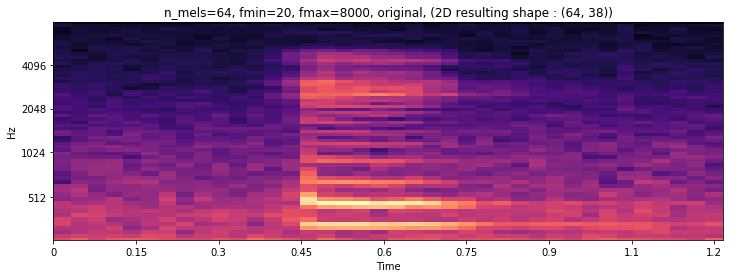

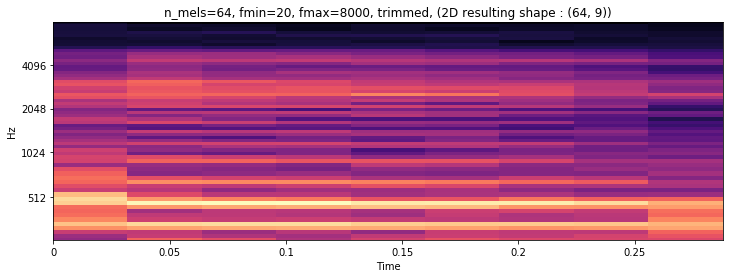

In [17]:
wave_file = paths[5]

clip, sample_rate = librosa.load(wave_file, sr=None)
print('Sample Rate   {} Hz'.format(sample_rate))
print('Clip Length   {:3.2f} seconds'.format(librosa.get_duration(clip, sample_rate)))

trimmed_clip, _ = librosa.effects.trim(clip, top_db=10, frame_length=256, hop_length=128)
print('Trimmed clip Length   {:3.2f} seconds'.format(librosa.get_duration(trimmed_clip, sample_rate)))

plot_audio(clip, sample_rate, wave_file)
plot_audio(trimmed_clip, sample_rate, str(wave_file) + ' trimmed')

plot_spectrogram(clip, sample_rate, 'original')
plot_spectrogram(trimmed_clip, sample_rate, 'trimmed')

#Index : 6, Class label : 7, Vowel : 'အဲ'

Sample Rate   16000 Hz
Clip Length   1.18 seconds
Trimmed clip Length   0.29 seconds


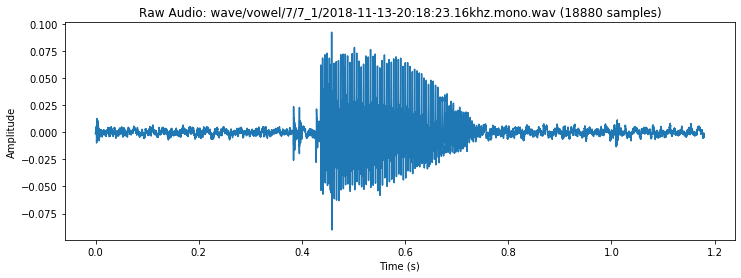

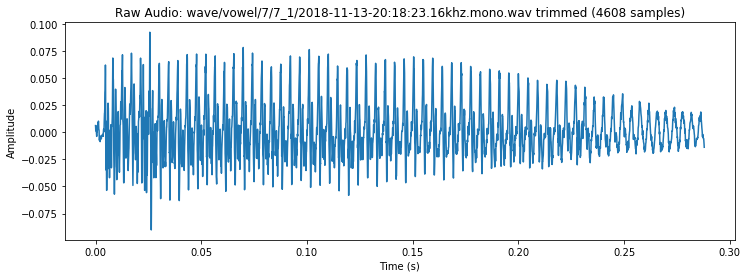

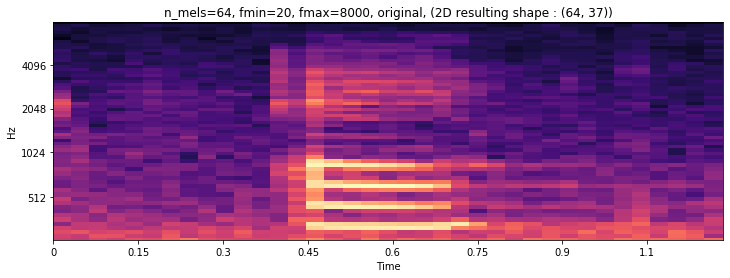

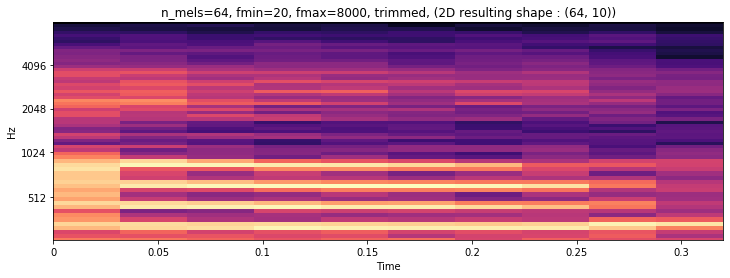

In [18]:
wave_file = paths[6]

clip, sample_rate = librosa.load(wave_file, sr=None)
print('Sample Rate   {} Hz'.format(sample_rate))
print('Clip Length   {:3.2f} seconds'.format(librosa.get_duration(clip, sample_rate)))

trimmed_clip, _ = librosa.effects.trim(clip, top_db=10, frame_length=256, hop_length=128)
print('Trimmed clip Length   {:3.2f} seconds'.format(librosa.get_duration(trimmed_clip, sample_rate)))

plot_audio(clip, sample_rate, wave_file)
plot_audio(trimmed_clip, sample_rate, str(wave_file) + ' trimmed')

plot_spectrogram(clip, sample_rate, 'original')
plot_spectrogram(trimmed_clip, sample_rate, 'trimmed')

#Index : 7, Class label : 8, Vowel : 'အော့'

Sample Rate   16000 Hz
Clip Length   1.19 seconds
Trimmed clip Length   0.10 seconds


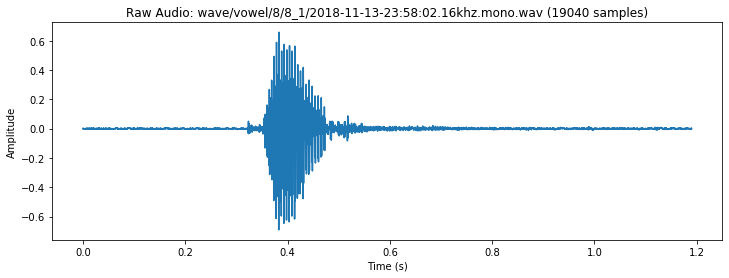

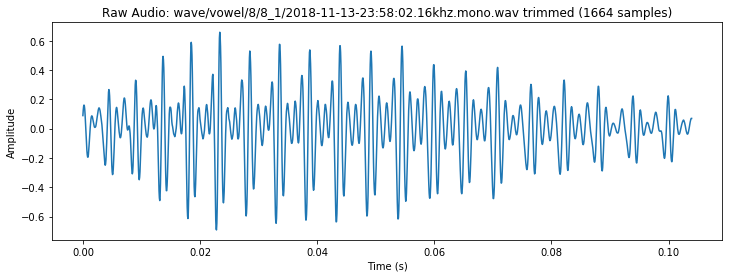

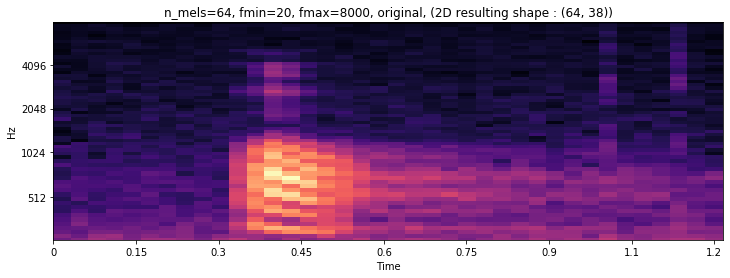

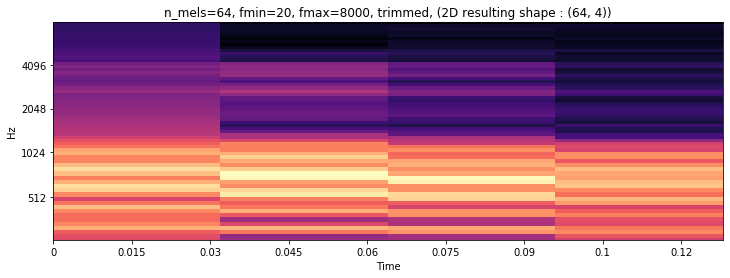

In [19]:
wave_file = paths[7]

clip, sample_rate = librosa.load(wave_file, sr=None)
print('Sample Rate   {} Hz'.format(sample_rate))
print('Clip Length   {:3.2f} seconds'.format(librosa.get_duration(clip, sample_rate)))

trimmed_clip, _ = librosa.effects.trim(clip, top_db=10, frame_length=256, hop_length=128)
print('Trimmed clip Length   {:3.2f} seconds'.format(librosa.get_duration(trimmed_clip, sample_rate)))

plot_audio(clip, sample_rate, wave_file)
plot_audio(trimmed_clip, sample_rate, str(wave_file) + ' trimmed')

plot_spectrogram(clip, sample_rate, 'original')
plot_spectrogram(trimmed_clip, sample_rate, 'trimmed')

#Index : 8, Class label : 9, Vowel : 'အော်'

Sample Rate   16000 Hz
Clip Length   0.98 seconds
Trimmed clip Length   0.36 seconds


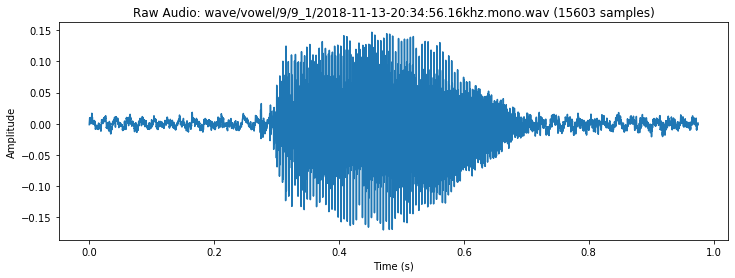

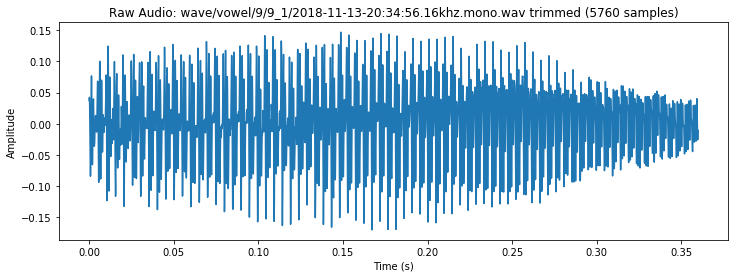

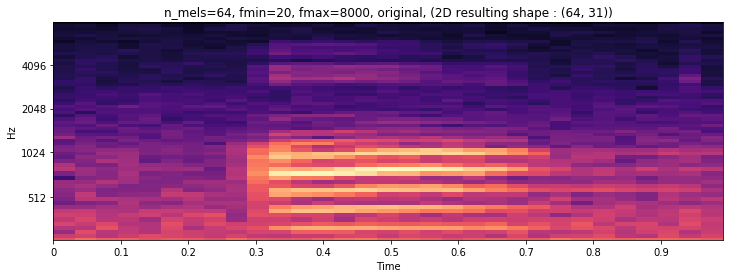

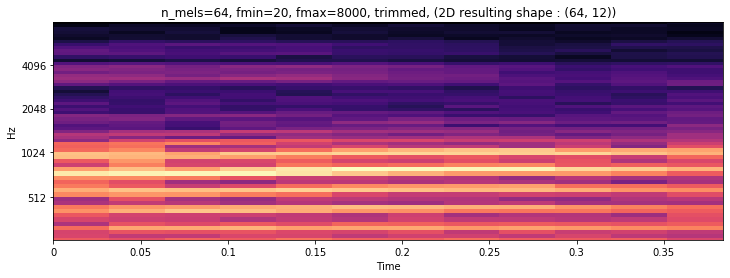

In [20]:
wave_file = paths[8]

clip, sample_rate = librosa.load(wave_file, sr=None)
print('Sample Rate   {} Hz'.format(sample_rate))
print('Clip Length   {:3.2f} seconds'.format(librosa.get_duration(clip, sample_rate)))

trimmed_clip, _ = librosa.effects.trim(clip, top_db=10, frame_length=256, hop_length=128)
print('Trimmed clip Length   {:3.2f} seconds'.format(librosa.get_duration(trimmed_clip, sample_rate)))

plot_audio(clip, sample_rate, wave_file)
plot_audio(trimmed_clip, sample_rate, str(wave_file) + ' trimmed')

plot_spectrogram(clip, sample_rate, 'original')
plot_spectrogram(trimmed_clip, sample_rate, 'trimmed')

#Index : 9, Class label : 10, Vowel : 'အံ'

Sample Rate   16000 Hz
Clip Length   1.39 seconds
Trimmed clip Length   0.30 seconds


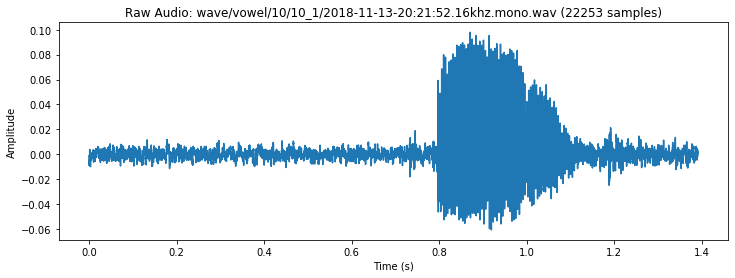

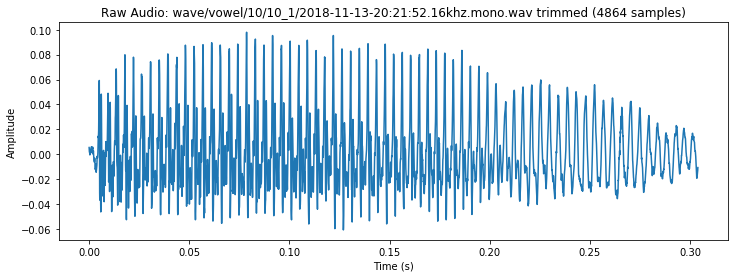

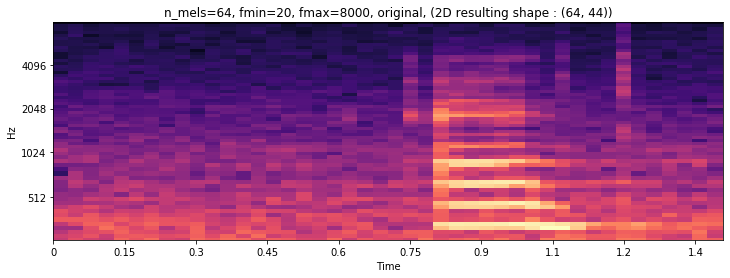

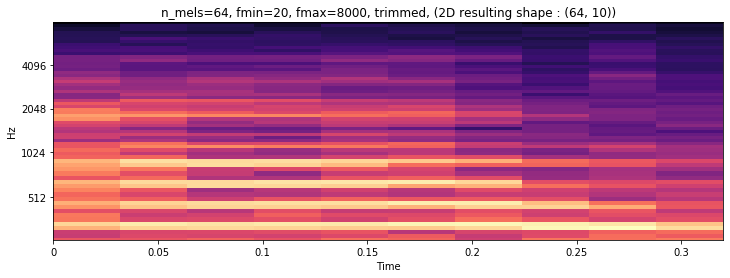

In [21]:
wave_file = paths[9]

clip, sample_rate = librosa.load(wave_file, sr=None)
print('Sample Rate   {} Hz'.format(sample_rate))
print('Clip Length   {:3.2f} seconds'.format(librosa.get_duration(clip, sample_rate)))

trimmed_clip, _ = librosa.effects.trim(clip, top_db=10, frame_length=256, hop_length=128)
print('Trimmed clip Length   {:3.2f} seconds'.format(librosa.get_duration(trimmed_clip, sample_rate)))

plot_audio(clip, sample_rate, wave_file)
plot_audio(trimmed_clip, sample_rate, str(wave_file) + ' trimmed')

plot_spectrogram(clip, sample_rate, 'original')
plot_spectrogram(trimmed_clip, sample_rate, 'trimmed')

#Index : 10, Class label : 11, Vowel : 'အား'

Sample Rate   16000 Hz
Clip Length   1.19 seconds
Trimmed clip Length   0.30 seconds


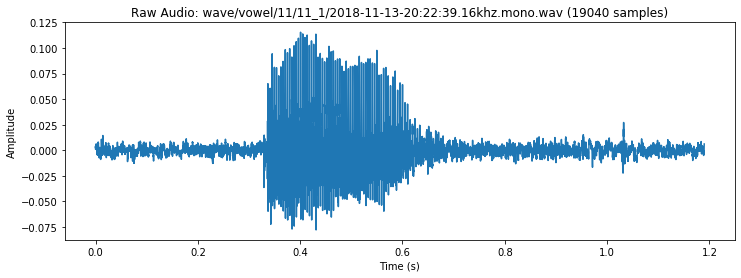

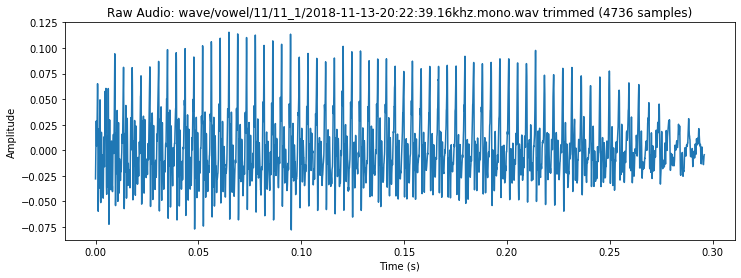

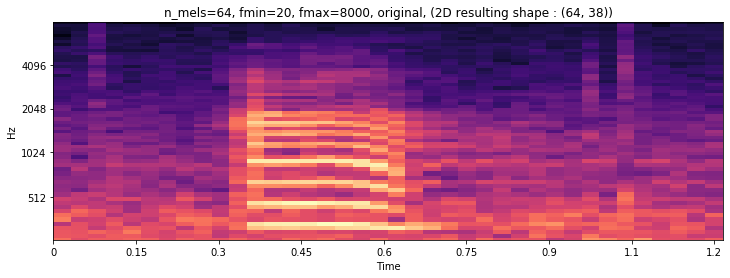

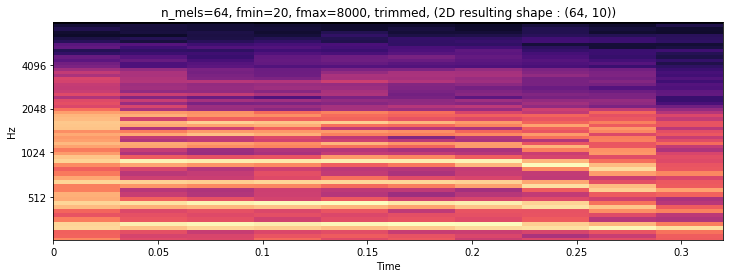

In [22]:
wave_file = paths[10]

clip, sample_rate = librosa.load(wave_file, sr=None)
print('Sample Rate   {} Hz'.format(sample_rate))
print('Clip Length   {:3.2f} seconds'.format(librosa.get_duration(clip, sample_rate)))

trimmed_clip, _ = librosa.effects.trim(clip, top_db=10, frame_length=256, hop_length=128)
print('Trimmed clip Length   {:3.2f} seconds'.format(librosa.get_duration(trimmed_clip, sample_rate)))

plot_audio(clip, sample_rate, wave_file)
plot_audio(trimmed_clip, sample_rate, str(wave_file) + ' trimmed')

plot_spectrogram(clip, sample_rate, 'original')
plot_spectrogram(trimmed_clip, sample_rate, 'trimmed')

#Index : 11, Class label : 12, Vowel : 'အက်'

Sample Rate   16000 Hz
Clip Length   1.58 seconds
Trimmed clip Length   0.10 seconds


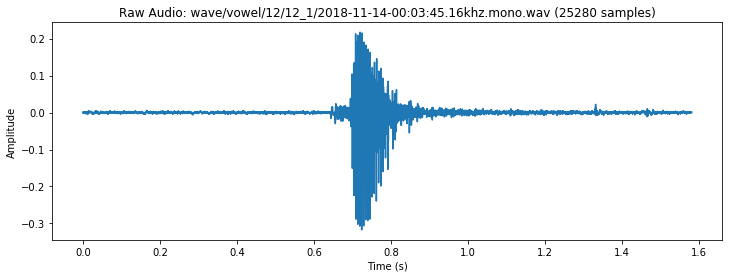

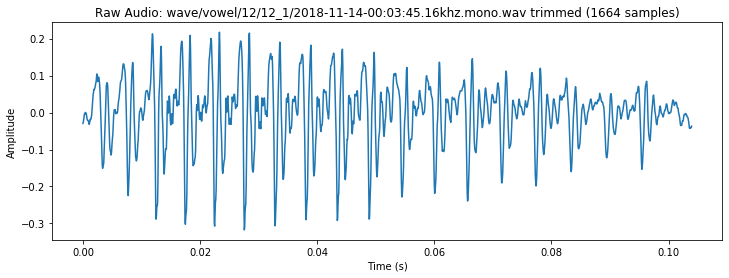

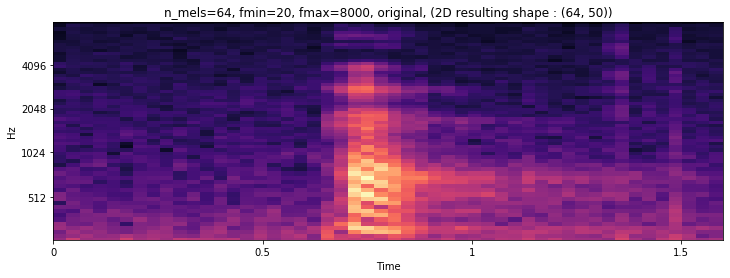

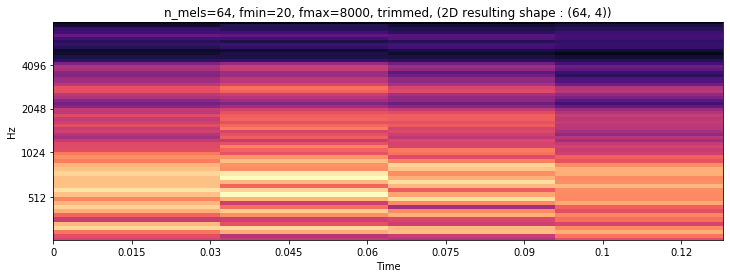

In [23]:
wave_file = paths[11]

clip, sample_rate = librosa.load(wave_file, sr=None)
print('Sample Rate   {} Hz'.format(sample_rate))
print('Clip Length   {:3.2f} seconds'.format(librosa.get_duration(clip, sample_rate)))

trimmed_clip, _ = librosa.effects.trim(clip, top_db=10, frame_length=256, hop_length=128)
print('Trimmed clip Length   {:3.2f} seconds'.format(librosa.get_duration(trimmed_clip, sample_rate)))

plot_audio(clip, sample_rate, wave_file)
plot_audio(trimmed_clip, sample_rate, str(wave_file) + ' trimmed')

plot_spectrogram(clip, sample_rate, 'original')
plot_spectrogram(trimmed_clip, sample_rate, 'trimmed')